<a href="https://colab.research.google.com/github/josephjvalavi/miniproject/blob/main/projectmini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sb
import nltk
import re
import warnings
from sklearn import preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB


In [5]:
df=pd.read_csv("/content/bbc-text.csv.zip")
df.head()
df['category'].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [6]:
df.head

<bound method NDFrame.head of            category                                               text
0              tech  tv future in the hands of viewers with home th...
1          business  worldcom boss  left books alone  former worldc...
2             sport  tigers wary of farrell  gamble  leicester say ...
3             sport  yeading face newcastle in fa cup premiership s...
4     entertainment  ocean s twelve raids box office ocean s twelve...
...             ...                                                ...
2220       business  cars pull down us retail figures us retail sal...
2221       politics  kilroy unveils immigration policy ex-chatshow ...
2222  entertainment  rem announce new glasgow concert us band rem h...
2223       politics  how political squabbles snowball it s become c...
2224          sport  souness delight at euro progress boss graeme s...

[2225 rows x 2 columns]>

In [7]:
df.describe()


,category,text
count,2225,2225
unique,5,2126
top,sport,howl helps boost japan s cinemas japan s box o...
freq,511,2


In [8]:
import matplotlib  as plt
import numpy as np
table = pd.pivot_table(data=df,index='category',aggfunc=np.sum)
table

,text
category,
business,worldcom boss left books alone former worldc...
entertainment,ocean s twelve raids box office ocean s twelve...
politics,howard hits back at mongrel jibe michael howar...
sport,tigers wary of farrell gamble leicester say ...
tech,tv future in the hands of viewers with home th...


In [9]:
df.duplicated().sum()
df = df.drop_duplicates()

In [10]:
df.isnull().any()



category    False
text        False
dtype: bool

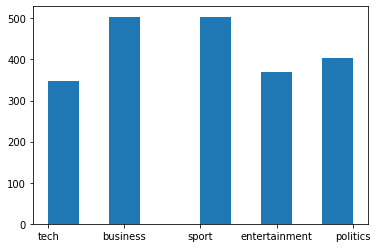

In [11]:
import matplotlib.pyplot as plt

plt.hist(df["category"])
labels = ("category")
plt.show()

In [12]:
df['num_characters'] = df['text'].apply(len)
df.tail()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,category,text,num_characters
2220,business,cars pull down us retail figures us retail sal...,1745
2221,politics,kilroy unveils immigration policy ex-chatshow ...,955
2222,entertainment,rem announce new glasgow concert us band rem h...,1648
2223,politics,how political squabbles snowball it s become c...,4684
2224,sport,souness delight at euro progress boss graeme s...,1167


In [13]:
df.describe()

,num_characters
count,2126.000000
mean,2262.765287
std,1382.011347
min,501.000000
25%,1437.500000
50%,1956.500000
75%,2801.500000
max,25483.000000


In [14]:
df.shape

(2126, 3)

In [15]:
df.isnull().any()

category          False
text              False
num_characters    False
dtype: bool

In [16]:
df["text_length"]=df["text"].str.len()
df["text_length"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       4333
1       1842
2       1342
3       2176
4       1579
        ... 
2220    1745
2221     955
2222    1648
2223    4684
2224    1167
Name: text_length, Length: 2126, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


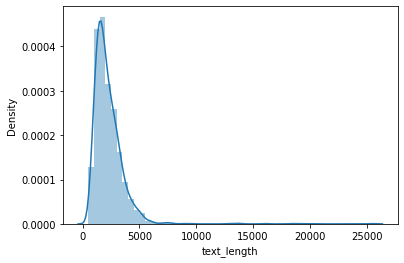

In [17]:
sb.distplot(df["text_length"])

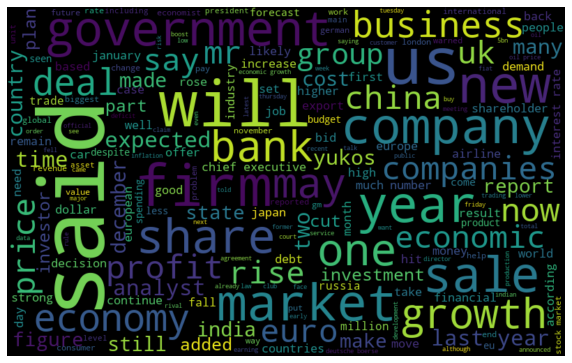

In [18]:
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=20,max_font_size=130).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
subset=df[df.category=="business"]
text=subset.text.values
words =" ".join(text)
create_wordcloud(words)

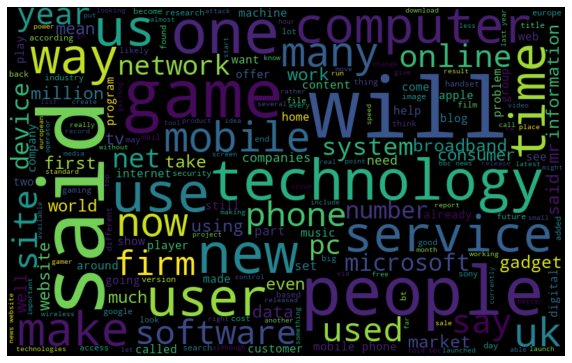

In [19]:
subset=df[df.category=="tech"]
text=subset.text.values
words =" ".join(text)
create_wordcloud(words)

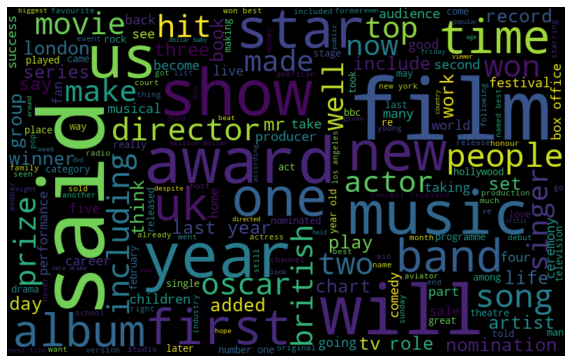

In [20]:
subset=df[df.category=="entertainment"]
text=subset.text.values
words =" ".join(text)
create_wordcloud(words)

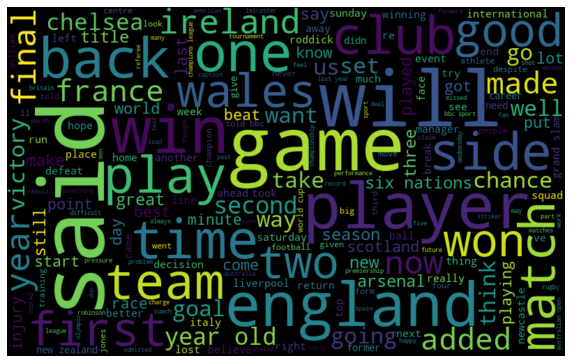

In [21]:
subset=df[df.category=="sport"]
text=subset.text.values
words =" ".join(text)
create_wordcloud(words)

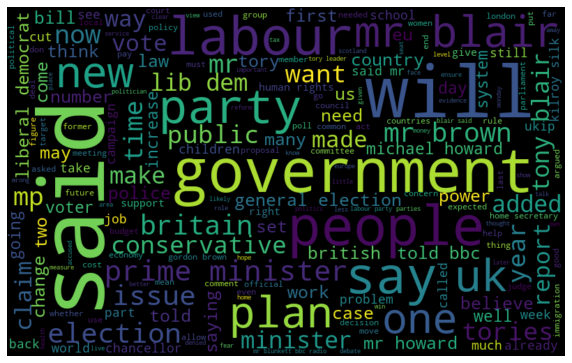

In [22]:
subset=df[df.category=="politics"]
text=subset.text.values
words =" ".join(text)
create_wordcloud(words)

STOPWORDS

In [23]:
stop_words = set(stopwords.words('english')) 
print(stop_words)

{'am', "mightn't", 'or', "you've", 'only', 'both', 'while', 'during', 'himself', 'those', 'an', "you're", "you'd", 'me', 'been', 'doesn', 'into', 'doing', 'aren', 'not', 'have', 'your', 'some', 'the', 'hadn', 'be', 'here', 'before', 'y', 'ours', 'mustn', 'should', 'haven', 'from', 'didn', 'having', 'why', 'then', 'by', 'yourself', 'each', 'very', 'had', 'any', 'it', "wasn't", 'when', 'd', 'couldn', 'was', "couldn't", 'has', 'does', "won't", 'until', 'our', 'nor', 'being', "mustn't", 'do', 'his', "hasn't", 'themselves', 'hers', 'of', 'a', 'below', 'will', 'for', 'to', 'yours', 'she', 're', 'such', 'hasn', 've', 'where', 'own', 'at', 'her', 'theirs', 'so', 'again', "hadn't", "it's", 'he', 'my', 'over', 'and', 'did', 'with', 'there', 'shan', 'who', 'shouldn', "that'll", 'down', 'if', 'm', 'that', 'don', 'further', 's', 'through', 'most', 'how', 'above', 'between', 'after', 'mightn', 'needn', 't', "shouldn't", 'on', 'are', "shan't", 'under', "doesn't", 'o', "didn't", 'now', 'them', "wouldn

In [24]:
def process_text(text):
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]','',text)

    tokens=word_tokenize(text)
    filtered_sentence=[]
    for f in tokens:
      if f not in stop_words:
        filtered_sentence.append(f) 
    text = " ".join(filtered_sentence)
    return(text)
    

   
    


In [25]:
df['text-parsed']=df['text'].apply(process_text)
df['text-parsed']
df.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,category,text,num_characters,text_length,text-parsed
2220,business,cars pull down us retail figures us retail sal...,1745,1745,cars pull us retail figures us retail sales fe...
2221,politics,kilroy unveils immigration policy ex-chatshow ...,955,955,kilroy unveils immigration policy exchatshow h...
2222,entertainment,rem announce new glasgow concert us band rem h...,1648,1648,rem announce new glasgow concert us band rem a...
2223,politics,how political squabbles snowball it s become c...,4684,4684,political squabbles snowball become commonplac...
2224,sport,souness delight at euro progress boss graeme s...,1167,1167,souness delight euro progress boss graeme soun...


In [26]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

label encoding


In [27]:
label_encoder=preprocessing.LabelEncoder()
df["category_encoded"]=label_encoder.fit_transform(df['category'])
df["category_encoded"]
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,category,text,num_characters,text_length,text-parsed,category_encoded
0,tech,tv future in the hands of viewers with home th...,4333,4333,tv future hands viewers home theatre systems p...,4
1,business,worldcom boss left books alone former worldc...,1842,1842,worldcom boss left books alone former worldcom...,0
2,sport,tigers wary of farrell gamble leicester say ...,1342,1342,tigers wary farrell gamble leicester say rushe...,3
3,sport,yeading face newcastle in fa cup premiership s...,2176,2176,yeading face newcastle fa cup premiership side...,3
4,entertainment,ocean s twelve raids box office ocean s twelve...,1579,1579,ocean twelve raids box office ocean twelve cri...,1


In [28]:
df["category_encoded"]= df["category_encoded"].map(str)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,category,text,num_characters,text_length,text-parsed,category_encoded
0,tech,tv future in the hands of viewers with home th...,4333,4333,tv future hands viewers home theatre systems p...,4
1,business,worldcom boss left books alone former worldc...,1842,1842,worldcom boss left books alone former worldcom...,0
2,sport,tigers wary of farrell gamble leicester say ...,1342,1342,tigers wary farrell gamble leicester say rushe...,3
3,sport,yeading face newcastle in fa cup premiership s...,2176,2176,yeading face newcastle fa cup premiership side...,3
4,entertainment,ocean s twelve raids box office ocean s twelve...,1579,1579,ocean twelve raids box office ocean twelve cri...,1


In [29]:
df.to_csv('BBC_News_processed.csv')
df.head()

,category,text,num_characters,text_length,text-parsed,category_encoded
0,tech,tv future in the hands of viewers with home th...,4333,4333,tv future hands viewers home theatre systems p...,4
1,business,worldcom boss left books alone former worldc...,1842,1842,worldcom boss left books alone former worldcom...,0
2,sport,tigers wary of farrell gamble leicester say ...,1342,1342,tigers wary farrell gamble leicester say rushe...,3
3,sport,yeading face newcastle in fa cup premiership s...,2176,2176,yeading face newcastle fa cup premiership side...,3
4,entertainment,ocean s twelve raids box office ocean s twelve...,1579,1579,ocean twelve raids box office ocean twelve cri...,1


train test split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(df["text-parsed"],df["category_encoded"],test_size=0.2,random_state=8)
X_train.shape
X_test
y_train
y_test

1393    4
407     0
1076    1
1557    3
2073    3
       ..
1208    2
355     0
1940    3
1890    3
272     3
Name: category_encoded, Length: 426, dtype: object

tfidf vectoriser

In [31]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features=300


test

In [32]:
#c=df["text-parsed"]
#vect=CountVectorizer()
#X = vect.fit_transform(c)
#print(vect.get_feature_names_out())



tfidf vectoriser

In [33]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)
print(features_train)
print(labels_train.shape)






(1700, 300)
[[0.         0.         0.         ... 0.05836596 0.06425587 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.23825165 0.         ... 0.08370471 0.         0.11023775]
 [0.         0.         0.         ... 0.         0.19555335 0.1114706 ]
 [0.         0.         0.         ... 0.11012329 0.         0.        ]]
(1700,)


In [34]:
features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)
print(labels_test.shape)
print(features_test)

(426, 300)
(426,)
[[0.         0.         0.         ... 0.06191693 0.         0.        ]
 [0.         0.         0.         ... 0.09002578 0.09911059 0.1185625 ]
 [0.11458802 0.1250315  0.         ... 0.0743752  0.19539136 0.        ]
 ...
 [0.         0.         0.         ... 0.1210409  0.13325556 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.10780734 0.        ]]


In [35]:
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier(random_state=1)
model.fit(features_train,labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))
print(model_predictions)
print(confusion_matrix(y_test,model_predictions))

Accuracy:  0.9225352112676056
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       102
           1       0.86      0.94      0.90        78
           2       0.92      0.90      0.91        77
           3       0.95      0.97      0.96       107
           4       0.96      0.89      0.92        62

    accuracy                           0.92       426
   macro avg       0.92      0.92      0.92       426
weighted avg       0.92      0.92      0.92       426

['4' '0' '1' '3' '3' '0' '3' '3' '3' '1' '4' '0' '0' '2' '1' '3' '3' '1'
 '1' '1' '3' '2' '2' '3' '0' '2' '3' '3' '3' '4' '1' '4' '1' '2' '0' '0'
 '2' '4' '0' '0' '3' '3' '3' '3' '3' '1' '0' '2' '3' '3' '0' '4' '3' '0'
 '2' '3' '2' '4' '2' '4' '4' '2' '2' '1' '3' '0' '3' '0' '0' '1' '1' '0'
 '0' '2' '3' '3' '1' '3' '0' '3' '1' '1' '2' '4' '4' '4' '0' '0' '3' '3'
 '0' '1' '0' '0' '1' '0' '1' '0' '3' '0' '3' '1' '3' '3' '2' '1' '1' '0'
 '3' '4' '4' '2' '4' '2' '0' '0' '4' '1' '2

In [36]:
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9225352112676056
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       102
           1       0.86      0.94      0.90        78
           2       0.92      0.90      0.91        77
           3       0.95      0.97      0.96       107
           4       0.96      0.89      0.92        62

    accuracy                           0.92       426
   macro avg       0.92      0.92      0.92       426
weighted avg       0.92      0.92      0.92       426



In [37]:
model = MultinomialNB()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))
print(model_predictions)
print(confusion_matrix(y_test,model_predictions))

Accuracy:  0.9413145539906104
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       102
           1       0.96      0.94      0.95        78
           2       0.96      0.92      0.94        77
           3       0.95      0.97      0.96       107
           4       0.89      0.89      0.89        62

    accuracy                           0.94       426
   macro avg       0.94      0.94      0.94       426
weighted avg       0.94      0.94      0.94       426

['4' '0' '1' '3' '3' '0' '3' '3' '3' '1' '4' '0' '0' '2' '1' '3' '3' '1'
 '1' '1' '3' '2' '2' '3' '0' '0' '3' '3' '3' '4' '1' '4' '1' '0' '0' '0'
 '2' '4' '0' '0' '3' '3' '3' '3' '3' '1' '0' '2' '3' '3' '0' '4' '3' '0'
 '2' '3' '2' '4' '2' '4' '4' '2' '2' '2' '3' '0' '3' '0' '0' '4' '1' '0'
 '0' '2' '3' '3' '1' '3' '0' '3' '1' '1' '2' '4' '4' '4' '0' '0' '3' '3'
 '0' '1' '0' '0' '1' '0' '1' '0' '3' '4' '4' '1' '3' '3' '2' '1' '1' '0'
 '3' '4' '4' '2' '4' '2' '0' '2' '4' '1' '2

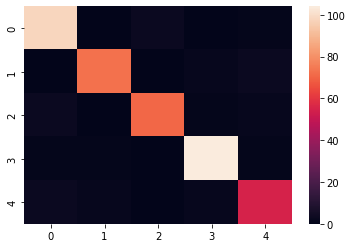

In [40]:


sb.heatmap(confusion_matrix(y_test,model_predictions))


In [ ]:
new="Parineeti defends emotional stories on reality shows: We are never given scripts"